In [0]:
!pip install opencv-python==3.4.2.16

     |████████████████████████████████| 25.0MB 10.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [0]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 1.5MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


# Import

In [0]:
import os
import cv2
import copy
import csv
import random
import pickle
import numpy as np
import pandas as pd
import itertools
from google.colab import files
from scipy.stats import randint
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [0]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Import different classifiers
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage.feature import hog, local_binary_pattern

# Functions

## Write CSV

In [0]:
def write_csv(file, a1, a2, a3, a4, a5, a6, a7, name):
    with open(file, mode='w') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(name)
        for i in range(20):
            if a2[i] == None:
                a2[i] = 'None'
            if a4[i] == None:
                a4[i] = 'None'
            csv_writer.writerow([a1[i], a2[i], a3[i], a4[i], a5[i], a6[i], a7[i]])

## Read dataset:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
corpus = os.path.join("/content/drive/My Drive/", 'quickdraw_small')

In [0]:
os.listdir(corpus+'/train')

['full_numpy_bitmap_crown.npy',
 'full_numpy_bitmap_headphones.npy',
 'full_numpy_bitmap_pants.npy',
 'full_numpy_bitmap_alarm clock.npy',
 'full_numpy_bitmap_bicycle.npy',
 'full_numpy_bitmap_airplane.npy',
 'full_numpy_bitmap_car.npy',
 'full_numpy_bitmap_banana.npy',
 'full_numpy_bitmap_fish.npy',
 'full_numpy_bitmap_baseball bat.npy',
 'full_numpy_bitmap_ice cream.npy',
 'full_numpy_bitmap_flower.npy',
 'full_numpy_bitmap_dumbbell.npy',
 'full_numpy_bitmap_candle.npy',
 'full_numpy_bitmap_windmill.npy',
 'full_numpy_bitmap_umbrella.npy',
 'full_numpy_bitmap_shoe.npy',
 'full_numpy_bitmap_hat.npy',
 'full_numpy_bitmap_knife.npy',
 'full_numpy_bitmap_eye.npy']

In [0]:
count = 0
path = corpus+'/train'
class_label = []
for file_name in sorted(os.listdir(path)):
    if count < 10:
        count += 1
        file_path = path + '/' + file_name
        classes = file_name.split('_')[-1].split('.')[0]
        class_label.append(classes)

In [0]:
class_label = ['airplane',
  'alarm clock',
  'banana',
  'baseball bat',
  'bicycle',
  'car',
  'crown',
  'fish',
  'headphones',
  'pants']


In [0]:
count = 0
te_data = []
te_label = []
path = corpus+'/train'

for file_name in os.listdir(path):
    if count < 10:
        count += 1
        file_path = path + '/' + file_name
        arr = np.load(file_path)
        classes = file_name.split('_')[-1].split('.')[0]
        for i in range(0, arr.shape[0]):
            temp_arr = arr[i].reshape(28, 28)
            te_data.append(temp_arr)
            te_label.append(class_label.index(classes))

train_imgs = np.array(te_data)
train_y = np.array(te_label)

In [0]:
del te_data
del te_label

In [0]:
count = 0
te_data = []
te_label = []
path = corpus+'/test'

for file_name in os.listdir(path):
    if count < 10:
        count += 1
        file_path = path + '/' + file_name
        arr = np.load(file_path)
        classes = file_name.split('_')[-1].split('.')[0]
        for i in range(0, arr.shape[0]):
            temp_arr = arr[i].reshape(28, 28)
            te_data.append(temp_arr)
            te_label.append(class_label.index(classes))

test_imgs = np.array(te_data)
test_y = np.array(te_label)

In [0]:
del te_data
del te_label

In [0]:
count = 0
te_data = []
te_label = []
path = corpus+'/valid'

for file_name in os.listdir(path):
    if count < 10:
        count += 1
        file_path = path + '/' + file_name
        arr = np.load(file_path)
        classes = file_name.split('_')[-1].split('.')[0]
        for i in range(0, arr.shape[0]):
            temp_arr = arr[i].reshape(28, 28)
            te_data.append(temp_arr)
            te_label.append(class_label.index(classes))

val_imgs = np.array(te_data)
val_y = np.array(te_label)

In [0]:
del te_data
del te_label

In [0]:
train_imgs.shape, train_y.shape, test_imgs.shape, test_y.shape, val_imgs.shape, val_y.shape

((84000, 28, 28),
 (84000,),
 (30000, 28, 28),
 (30000,),
 (36000, 28, 28),
 (36000,))

## Save / Load Extracted Features:

In [0]:
def save_feature(feature, name):
    # saving all our feature vectors in pickled file
    with open(corpus+'/cache/' + name + '.pkl', 'wb') as fp:
        pickle.dump(csr_matrix(feature), fp)
    
    print(f'Feature saved with name cache/{name}.pkl')

def load_feature(feature_name):
    return pickle.load(open(feature_name, 'rb')).A

## Save / Load Trained Model:

In [0]:
def save_model(model):
    filename = input('Enter model file name:')
    pickle.dump(model, open(corpus+'/models/'+filename + '.pkl', 'wb'))
    print(f'Successfully saved model in models/{filename}.pkl')

def load_model(model_name):
    return pickle.load(open(model_name, 'rb'))

## Features:

### Flattened Image:

In [0]:
def get_flattened(images, name='flattened', save=False):
    """
    color: default RGB2GRAY, if None is passed then color is used as it is.
    """
    color_images = images
    count = len(color_images)
    
    result = np.array(color_images).reshape(count, -1)
    
    if save:
        save_feature(result, name)
        
    return result

### HOG based Features:

In [0]:
def get_hog(images, name='hog', save=False):
    result = np.array([hog(img, block_norm='L2') for img in images])
    
    if save:
        save_feature(result, name)
        
    return result

### KAZE based features:

In [0]:
def get_kaze(images, name='kaze', save=False):
    # KAZE descriptor for 1 image
    def get_image_kaze(image, vector_size=20):
        alg = cv2.KAZE_create()
        kps = alg.detect(image)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
        return dsc
    
    # KAZE descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_kaze(img)
        features.append(dsc)
    
    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

### SIFT based Features:

In [0]:
def get_sift(images, name='sift', save=False):
    # SIFT descriptor for 1 image
    def get_image_sift(image, vector_size=8):
        alg = cv2.xfeatures2d.SIFT_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 128
        needed_size = (vector_size * 128)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SIFT descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_sift(img)
        features.append(dsc)

    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

In [0]:
def return_sift_kp(image):
    alg = cv2.xfeatures2d.SIFT_create()
    kps = alg.detect(image, None)
    kps = sorted(kps, key=lambda x: -x.response)[:15]

    # Making descriptor of same size
    # Descriptor vector size is 128
    needed_size = (15 * 128)
    if len(kps) == 0:
        dsc = np.zeros(needed_size)
    else:
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    return kps

### SURF based Features:

In [0]:
def get_surf(images, name='surf', save=False):
    # SURF descriptor for 1 image
    def get_image_surf(image, vector_size=4):
        alg = cv2.xfeatures2d.SURF_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SURF descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_surf(img)
        features.append(dsc)
    
    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

In [0]:
def return_surf_kp(image):
    alg = cv2.xfeatures2d.SURF_create()
    kps = alg.detect(image, None)
    kps = sorted(kps, key=lambda x: -x.response)[:4]

    # Making descriptor of same size
    # Descriptor vector size is 64
    needed_size = (15 * 64)
    if len(kps) == 0:
        dsc = np.zeros(needed_size)
    else:
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    return kps

### LBP Feature:

In [0]:
def get_lbp(images, name='lbp', save=False):
    result = np.array([local_binary_pattern(img, 10, 3).flatten() for img in images])
    
    if save:
        save_feature(result, name)
        
    return result

### Combine Features:

In [0]:
def combine_features(features, horizontal=True):
    """
    Array of features [f1, f2, f3] where each fi is a feature set 
    eg. f1=rgb_flat, f2=SIFT, etc.
    """
    if horizontal:
        return np.hstack(features)
    else:
        return np.vstack(features)

### Normalize features:

In [0]:
def norm_features_minmax(train, test):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_test = min_max_scaler.transform(test)
    
    return norm_train, norm_test

In [0]:
def norm_features_zscore(train, test):
    min_max_scaler = preprocessing.StandardScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_test = min_max_scaler.transform(test)
    
    return norm_train, norm_test

## Classifiers:

In [0]:
def train_model(train_x, train_y, model_name='NB', validation=None):
    """
    Possible model names: ['NB', 'SVM', 'XGB', 'MLP', 'ADA', 'BAG', 'RF']
    default = 'NB'
    
    validation: (val_x, val_y) tupple for validation accuracy score.
    
    return: trained model
    """
    model = None
    if model_name == 'SVM':
        model = svm.SVC(gamma='scale')
    elif model_name == 'XGB':
        model = XGBClassifier(n_estimators=200, max_depth=5, n_jobs=2)
#         model = XGBClassifier()
    elif model_name == 'MLP':
        model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=800, alpha=0.0001,
                     solver='sgd', verbose=10, tol=0.000000001)
    elif model_name == 'ADA':
        model = AdaBoostClassifier(n_estimators=50)
    elif model_name == 'BAG':
        model = BaggingClassifier(n_jobs=2, n_estimators=50)
    elif model_name == 'RF':
        model = RandomForestClassifier(n_estimators=200, max_depth=10)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    else:
        model = GaussianNB()
    
    model.fit(train_x, train_y)
    
    if validation is not None:
        y_hat = model.predict(validation[0])
        acc = metrics.accuracy_score(validation[1], y_hat)
        print(f"Validation Accuracy in '{model_name}' = {acc}")
        
    return model

## CMC, CM and MAP

In [0]:
def confusion_mat(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, figsize=(7,7), path=None, filename=None):
        """
        cm: confusion matrix to be plotted.
        classes: array of labels or class names.
        title: title of the confusion matrix.
        cmap: color of the plot matrix.
        figsize: tupple (width, height) representiong size of the plot.
        path: destination where the plot image will be saved.
        filename: name to save the file with on the specified path. (if None, title is used)
        
        # Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        cm = cm.astype(np.int64)
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        plt.grid(False)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        
        if path:
            if filename is None:
                plt.savefig(path + title + '.png')
            else:
                plt.savefig(path + filename + '.png')
        plt.show()

In [0]:
def cmc_curve(probs, y, idx_to_class):
    counts = np.zeros(len(idx_to_class))
    
    indices = np.argsort(probs * -1)
    for i in range(y.shape[0]):
        actual = y[i]
        rank = 1
        for pred in indices[i]:
            if pred == actual:
                break
            rank += 1
        
        counts[rank - 1] += 1
    
    ranks = np.zeros(len(idx_to_class))
    ranks[0] = counts[0]
    for i in range(1, len(idx_to_class)):
        ranks[i] = ranks[i-1] + counts[i]

    return ranks / y.shape[0]

In [0]:
def map3(model, validation=None):
    probs = model.predict_proba(validation[0])
    map_3 = 0
    for i in range(len(validation[1])):
        sort_arr = np.argsort(-probs[i])
        idx = np.where(sort_arr[:3] == validation[1][i])[0]
        if len(idx) == 0:
            continue
        map_3 += 1 / (idx[0]+1)
    map_3 = map_3 / len(validation[1])
    return map_3

## PCA projected data

In [0]:
def pca_projection(mat, name_arr):
    plt.figure(figsize=(10,15))
    for i, img in enumerate(mat, start=1):
        plt.subplot(3, 2, i)
        y = np.var(mat[i-1], axis=0)
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '--o')
        plt.ylabel('Variance')
        plt.xlabel('Data Projected on Eigen Vector Number')
        plt.xticks(x)
        plt.title(name_arr[i-1])
    plt.savefig(corpus+'/output/subplot.jpg')
    plt.show()

In [0]:
def draw_key_points(image, kp):
    img = cv2.drawKeypoints(image, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img

# Main calls

## Training:


### Training & Validation set features:

#### Data visualization:

In [0]:
class0 = train_imgs[train_y == 0][0]
class1 = train_imgs[train_y == 1][5]
class2 = train_imgs[train_y == 2][2]
class3 = train_imgs[train_y == 3][1]
classes = []
classes.append(class0)
classes.append(class1)
classes.append(class2)
classes.append(class3)

In [0]:
vis_img = np.zeros((len(classes), 28, 28))
lbp_img = np.zeros((len(classes), 28, 28))
sift = np.zeros((len(classes), 28, 28, 3))
surf = np.zeros((len(classes), 28, 28, 3))

for i in range(len(classes)):
    temp1, vis_img[i] = hog(classes[i], block_norm='L2', visualize=True)
    lbp_img[i] = local_binary_pattern(classes[i], 10, 3)
    sift[i] = draw_key_points(classes[i], return_sift_kp(classes[i]))
    surf[i] = draw_key_points(classes[i], return_surf_kp(classes[i]))

In [0]:
data_vis = []
for i in range(len(classes)):
    data_vis.append(classes[i])
for i in range(len(classes)):
    data_vis.append(vis_img[i])
for i in range(len(classes)):
    data_vis.append(lbp_img[i])
for i in range(len(classes)):
    data_vis.append(sift[i])
for i in range(len(classes)):
    data_vis.append(surf[i])

img_name_arr = []
for i in range(len(classes)):
    img_name_arr.append(class_label[i])
for i in range(len(classes)):
    img_name_arr.append('HOG of '+class_label[i])
for i in range(len(classes)):
    img_name_arr.append('LBP of '+class_label[i])
for i in range(len(classes)):
    img_name_arr.append('SIFT of '+class_label[i])
for i in range(len(classes)):
    img_name_arr.append('SURF of '+class_label[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


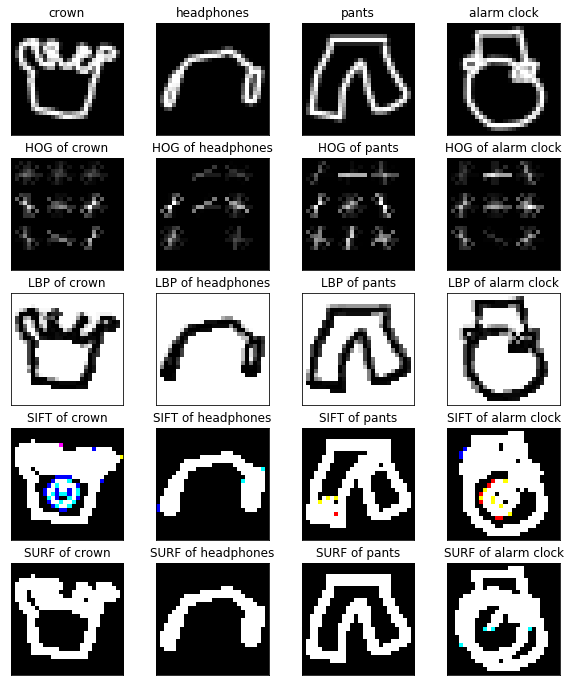

In [0]:
plt.figure(figsize=(10,12))
for i, img in enumerate(data_vis, start=1):
    plt.subplot(5, 4, i)
    plt.title(img_name_arr[i-1])
    frame1 = plt.gca()
    for tick in frame1.axes.get_xticklines():
        tick.set_visible(False)
    for tick in frame1.axes.get_yticklines():
        tick.set_visible(False)
    for xlabel_i in frame1.axes.get_xticklabels():
        xlabel_i.set_visible(False)
    for xlabel_i in frame1.axes.get_yticklabels():
        xlabel_i.set_visible(False)
    plt.imshow(data_vis[i-1], cmap='gray')
plt.savefig(corpus+'/output/data_vis.png')
plt.show()

#### HOG Features:

In [0]:
hog_train = get_hog(train_imgs, name='hog_train', save=True)
hog_val = get_hog(val_imgs, name='hog_val', save=True)

Feature saved with name cache/hog_train.pkl
Feature saved with name cache/hog_val.pkl


In [0]:
hog_train = load_feature(corpus+'/cache/hog_train.pkl')
hog_val = load_feature(corpus+'/cache/hog_val.pkl')

In [0]:
hog_train.shape, hog_val.shape

((84000, 81), (36000, 81))

#### LBP Features:

In [0]:
lbp_train = get_lbp(train_imgs, name='lbp_train', save=True)
lbp_val = get_lbp(val_imgs, name='lbp_val', save=True)

Feature saved with name cache/lbp_train.pkl
Feature saved with name cache/lbp_val.pkl


In [0]:
lbp_train = load_feature(corpus+'/cache/lbp_train.pkl')
lbp_val = load_feature(corpus+'/cache/lbp_val.pkl')

In [0]:
lbp_train.shape, lbp_val.shape

((84000, 784), (36000, 784))

#### KAZE Features:

In [0]:
kaze_train = get_kaze(train_imgs, name='kaze_train', save=True)
kaze_val = get_kaze(val_imgs, name='kaze_val', save=True)

In [0]:
kaze_train = load_feature(corpus+'/cache/kaze_train.pkl')
kaze_val = load_feature(corpus+'/cache/kaze_val.pkl')

In [0]:
kaze_train.shape, kaze_val.shape

#### SIFT Features:

In [0]:
sift_train = get_sift(train_imgs, name='sift_train', save=True)
sift_val = get_sift(val_imgs, name='sift_val', save=True)

Feature saved with name cache/sift_train.pkl
Feature saved with name cache/sift_val.pkl


In [0]:
sift_train = load_feature(corpus+'/cache/sift_train.pkl')
sift_val = load_feature(corpus+'/cache/sift_val.pkl')

In [0]:
sift_train.shape, sift_val.shape

((84000, 1024), (36000, 1024))

#### SURF Features:

In [0]:
surf_train = get_surf(train_imgs, name='surf_train', save=True)
surf_val = get_surf(val_imgs, name='surf_val', save=True)

Feature saved with name cache/surf_train.pkl
Feature saved with name cache/surf_val.pkl


In [0]:
surf_train = load_feature(corpus+'/cache/surf_train.pkl')
surf_val = load_feature(corpus+'/cache/surf_val.pkl')

In [0]:
surf_train.shape, surf_val.shape

((84000, 256), (36000, 256))

#### Flattened Image

In [0]:
flat_gray_train = get_flattened(train_imgs, name='flat_gray_train', save=True)
flat_gray_val = get_flattened(val_imgs, name='flat_gray_val', save=True)

Feature saved with name cache/flat_gray_train.pkl
Feature saved with name cache/flat_gray_val.pkl


In [0]:
flat_gray_train = load_feature(corpus+'/cache/flat_gray_train.pkl')
flat_gray_val = load_feature(corpus+'/cache/flat_gray_val.pkl')

In [0]:
flat_gray_train.shape, flat_gray_val.shape

((84000, 784), (36000, 784))

### Reduce Features by PCA:

#### HOG Features:

In [0]:
# norm_hog_train, norm_hog_val = norm_features_minmax(hog_train, hog_val)
norm_hog_train, norm_hog_val = norm_features_zscore(hog_train, hog_val)

In [0]:
pca = PCA(n_components=8)
pca_hog_train = pca.fit_transform(norm_hog_train)
pca_hog_val = pca.transform(norm_hog_val)

In [0]:
pca_hog_train.shape, pca_hog_val.shape

((84000, 8), (36000, 8))

#### LBP Features:

In [0]:
# norm_lbp_train, norm_lbp_val = norm_features_minmax(lbp_train, lbp_val)
norm_lbp_train, norm_lbp_val = norm_features_zscore(lbp_train, lbp_val)

In [0]:
pca = PCA(n_components=10)
pca_lbp_train = pca.fit_transform(norm_lbp_train)
pca_lbp_val = pca.transform(norm_lbp_val)

In [0]:
pca_lbp_train.shape, pca_lbp_val.shape

((84000, 10), (36000, 10))

#### KAZE Features:

In [0]:
norm_kaze_train, norm_kaze_val = norm_features_minmax(kaze_train, kaze_val)
# norm_kaze_train, norm_kaze_val = norm_features_zscore(kaze_train, kaze_val)

NameError: ignored

In [0]:
pca = PCA(n_components=15)
pca_kaze_train = pca.fit_transform(norm_kaze_train)
pca_kaze_val = pca.transform(norm_kaze_val)

In [0]:
pca_kaze_train.shape, pca_kaze_val.shape

((17636, 10), (4410, 10))

#### SIFT Features:

In [0]:
# norm_sift_train, norm_sift_val = norm_features_minmax(sift_train, sift_val)
norm_sift_train, norm_sift_val = norm_features_zscore(sift_train, sift_val)

In [0]:
pca = PCA(n_components=5)
pca_sift_train = pca.fit_transform(norm_sift_train)
pca_sift_val = pca.transform(norm_sift_val)

In [0]:
pca_sift_train.shape, pca_sift_val.shape

((84000, 5), (36000, 5))

#### SURF Features:

In [0]:
# norm_surf_train, norm_surf_val = norm_features_minmax(surf_train, surf_val)
norm_surf_train, norm_surf_val = norm_features_zscore(surf_train, surf_val)

In [0]:
pca = PCA(n_components=10)
pca_surf_train = pca.fit_transform(norm_surf_train)
pca_surf_val = pca.transform(norm_surf_val)

In [0]:
pca_surf_train.shape, pca_surf_val.shape

((84000, 10), (36000, 10))

#### Flattened Image

In [0]:
# norm_flat_gray_train, norm_flat_gray_val = norm_features_minmax(flat_gray_train, flat_gray_val)
norm_flat_gray_train, norm_flat_gray_val = norm_features_zscore(flat_gray_train, flat_gray_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
pca = PCA(n_components=10)
pca_flat_gray_train = pca.fit_transform(norm_flat_gray_train)
pca_flat_gray_val = pca.transform(norm_flat_gray_val)

In [0]:
pca_flat_gray_train.shape, pca_flat_gray_val.shape

((84000, 10), (36000, 10))

### Feature PCA variance comparison:

In [0]:
pca_array = []
pca_array.append(pca_hog_train)
pca_array.append(pca_lbp_train)
pca_array.append(pca_sift_train)
pca_array.append(pca_surf_train)
# pca_array.append(pca_kaze_train)
pca_array.append(pca_flat_gray_train)
len(pca_array)

5

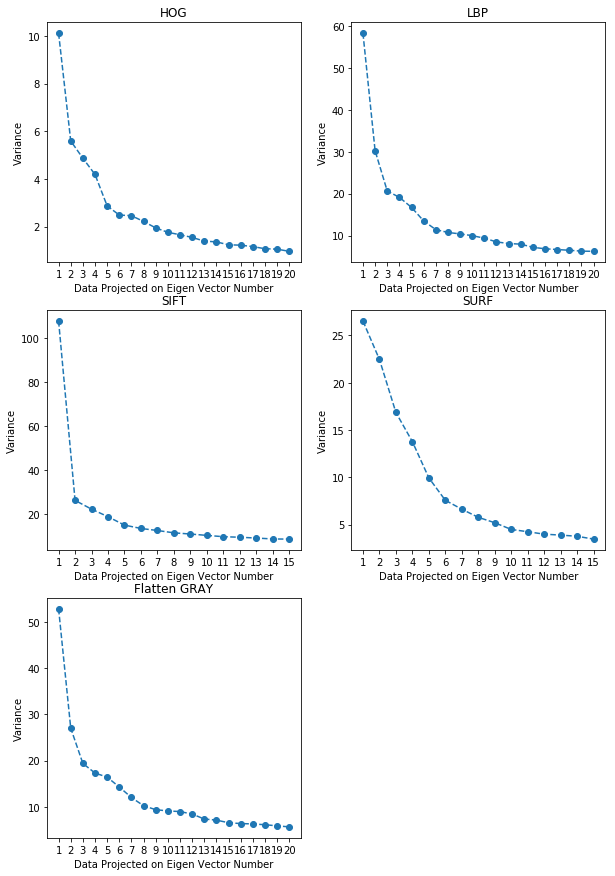

In [0]:
pca_projection(pca_array, ['HOG', 'LBP', 'SIFT', 'SURF', 'Flatten GRAY'])

### Reduce Features by LDA:

#### HOG Features:

In [0]:
lda = LDA()
lda_hog_train = lda.fit_transform(norm_hog_train, train_y)
lda_hog_val = lda.transform(norm_hog_val)

In [0]:
lda_hog_train.shape, lda_hog_val.shape

((84000, 9), (36000, 9))

#### LBP Features:

In [0]:
lda = LDA()
lda_lbp_train = lda.fit_transform(norm_lbp_train, train_y)
lda_lbp_val = lda.transform(norm_lbp_val)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [0]:
lda_lbp_train.shape, lda_lbp_val.shape

((84000, 9), (36000, 9))

#### SIFT

In [0]:
lda = LDA()
lda_sift_train = lda.fit_transform(norm_sift_train, train_y)
lda_sift_val = lda.transform(norm_sift_val)

In [0]:
lda_sift_train.shape, lda_sift_val.shape

((84000, 9), (36000, 9))

### Combine Features normal:

In [0]:
features_train = None
features_val = None
evs = []
for ft, fv in zip([hog_train, surf_train, flat_gray_train, lbp_train, sift_train], 
                  [hog_val, surf_val, flat_gray_val, lbp_val, sift_val]):    
#     scaler = preprocessing.StandardScaler()
#     ft = scaler.fit_transform(ft)
#     fv = scaler.transform(fv)
#     ft = preprocessing.normalize(ft)
#     fv = preprocessing.normalize(fv)
    if features_train is None:
        features_train = ft
        features_val = fv
    else:
        features_train = combine_features([features_train, ft])
        features_val = combine_features([features_val, fv])

In [0]:
features_train.shape, features_val.shape

### Combine Features PCA:

In [0]:
features_train = None
features_val = None
evs = []
for ft, fv in zip([pca_hog_train, pca_lbp_train, pca_sift_train, pca_surf_train, pca_flat_gray_train], 
                  [pca_hog_val, pca_lbp_val, pca_sift_val, pca_surf_val, pca_flat_gray_val]):    
#     scaler = preprocessing.StandardScaler()
#     ft = scaler.fit_transform(ft)
#     fv = scaler.transform(fv)
#     ft = preprocessing.normalize(ft)
#     fv = preprocessing.normalize(fv)
    if features_train is None:
        features_train = ft
        features_val = fv
    else:
        features_train = combine_features([features_train, ft])
        features_val = combine_features([features_val, fv])

In [0]:
features_train.shape, features_val.shape

((84000, 43), (36000, 43))

### Combine Features LDA:

In [0]:
features_train_lda = None
features_val_lda = None
evs = []
for ft, fv in zip([lda_hog_train, lda_lbp_train, lda_sift_train], 
                  [lda_hog_val, lda_lbp_val, lda_sift_val]):    
#     scaler = preprocessing.StandardScaler()
#     ft = scaler.fit_transform(ft)
#     fv = scaler.transform(fv)
#     ft = preprocessing.normalize(ft)
#     fv = preprocessing.normalize(fv)
    if features_train_lda is None:
        features_train_lda = ft
        features_val_lda = fv
    else:
        features_train_lda = combine_features([features_train_lda, ft])
        features_val_lda = combine_features([features_val_lda, fv])

In [0]:
features_train_lda.shape, features_val_lda.shape

((84000, 27), (36000, 27))

### Classification:

In [0]:
model1 = train_model(features_train, train_y, model_name='RF', validation=(features_val, val_y))

Validation Accuracy in 'RF' = 0.8641666666666666


In [0]:
model2 = train_model(features_train, train_y, model_name='BAG', validation=(features_val, val_y))

Validation Accuracy in 'BAG' = 0.8856111111111111


In [0]:
model3 = train_model(features_train, train_y, model_name='ADA', validation=(features_val, val_y))

Validation Accuracy in 'ADA' = 0.7478611111111111


In [0]:
model4 = train_model(features_train, train_y, model_name='NB', validation=(features_val, val_y))

Validation Accuracy in 'NB' = 0.7291111111111112


In [0]:
model5 = train_model(features_train, train_y, model_name='SVM', validation=(features_val, val_y))

Validation Accuracy in 'SVM' = 0.9141666666666667


In [0]:
model6 = train_model(np.array(features_train), train_y, model_name='XGB', validation=(features_val, val_y))

Validation Accuracy in 'XGB' = 0.9096111111111111


In [0]:
model7 = train_model(np.array(features_train), train_y, model_name='KNN', validation=(features_val, val_y))

Validation Accuracy in 'KNN' = 0.8607777777777778


In [0]:
model8 = train_model(features_train_lda, train_y, model_name='RF', validation=(features_val_lda, val_y))

Validation Accuracy in 'RF' = 0.8913055555555556


In [0]:
model9 = train_model(features_train_lda, train_y, model_name='BAG', validation=(features_val_lda, val_y))

Validation Accuracy in 'BAG' = 0.89925


In [0]:
model10 = train_model(features_train_lda, train_y, model_name='ADA', validation=(features_val_lda, val_y))

Validation Accuracy in 'ADA' = 0.8418333333333333


In [0]:
model11 = train_model(features_train_lda, train_y, model_name='NB', validation=(features_val_lda, val_y))

Validation Accuracy in 'NB' = 0.8843888888888889


In [0]:
model12 = train_model(features_train_lda, train_y, model_name='SVM', validation=(features_val_lda, val_y))

Validation Accuracy in 'SVM' = 0.9233333333333333


In [117]:
model13 = train_model(np.array(features_train_lda), train_y, model_name='XGB', validation=(features_val_lda, val_y))

Validation Accuracy in 'XGB' = 0.9145833333333333


In [0]:
model14 = train_model(np.array(features_train_lda), train_y, model_name='KNN', validation=(features_val_lda, val_y))

Validation Accuracy in 'KNN' = 0.9141111111111111


In [0]:
lda_features_val = load_feature(corpus+'/cache/lda_val_features.pkl')
pca_features_val = load_feature(corpus+'/cache/pca_val_features.pkl')
val_y1 = load_feature(corpus+'/cache/val_y.pkl')
val_y = val_y1.reshape(-1)

In [0]:
lda_rf = load_model(corpus+'/models/lda_rf.pkl')
lda_bag = load_model(corpus+'/models/lda_bag.pkl')
lda_ada = load_model(corpus+'/models/lda_ada.pkl')
lda_nb = load_model(corpus+'/models/lda_nb.pkl')
lda_svm = load_model(corpus+'/models/lda_svm.pkl')
lda_xgb = load_model(corpus+'/models/lda_xgb.pkl')
lda_knn = load_model(corpus+'/models/lda_knn.pkl')

In [0]:
map_lda_rf = map3(lda_rf, validation=(lda_features_val, val_y))
map_lda_rf

0.9249444444444337

In [0]:
map_lda_bag = map3(lda_bag, validation=(lda_features_val, val_y))
map_lda_bag

0.9290509259259181

In [0]:
map_lda_ada = map3(lda_ada, validation=(lda_features_val, val_y))
map_lda_ada

0.8951203703703584

In [0]:
map_lda_nb = map3(lda_nb, validation=(lda_features_val, val_y))
map_lda_nb

0.9196759259259168

In [0]:
map_lda_xgb = map3(lda_xgb, validation=(lda_features_val, val_y))
map_lda_xgb

0.9419537037036987

In [0]:
map_lda_knn = map3(lda_knn, validation=(lda_features_val, val_y))
map_lda_knn

0.9347916666666635

In [0]:
pca_rf = load_model(corpus+'/models/pca_rf.pkl')
pca_bag = load_model(corpus+'/models/pca_bag.pkl')
pca_ada = load_model(corpus+'/models/pca_ada.pkl')
pca_nb = load_model(corpus+'/models/pca_nb.pkl')
pca_svm = load_model(corpus+'/models/pca_svm.pkl')
pca_xgb = load_model(corpus+'/models/pca_xgb.pkl')
pca_knn = load_model(corpus+'/models/pca_knn.pkl')

In [0]:
map_pca_rf = map3(pca_rf, validation=(pca_features_val, val_y))
map_pca_rf

0.9049675925925794

In [0]:
map_pca_bag = map3(pca_bag, validation=(pca_features_val, val_y))
map_pca_bag

0.9197962962962873

In [0]:
map_pca_ada = map3(pca_ada, validation=(pca_features_val, val_y))
map_pca_ada

0.836268518518504

In [0]:
map_pca_nb = map3(pca_nb, validation=(pca_features_val, val_y))
map_pca_nb

0.8162037037036739

In [0]:
map_pca_xgb = map3(pca_xgb, validation=(pca_features_val, val_y))
map_pca_xgb

0.9381018518518447

In [0]:
map_pca_knn = map3(pca_knn, validation=(pca_features_val, val_y))
map_pca_knn

0.8965462962962895

### CM

In [0]:
y_hat1 = model13.predict(features_val_lda)

In [0]:
cm1 = metrics.confusion_matrix(val_y, y_hat1)

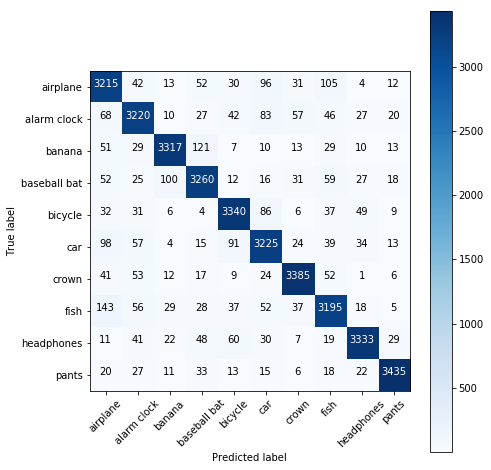

In [121]:
confusion_mat(cm1, class_label, title='', filename='Confusion Matrix with XGB on LDA', path=corpus+'/output/')

In [0]:
probs = model13.predict_proba(features_val_lda)
cmcs = cmc_curve(probs, val_y, class_label)

In [125]:
cmcs

array([0.91458333, 0.95911111, 0.97458333, 0.98288889, 0.98794444,
       0.99166667, 0.99483333, 0.99686111, 0.99872222, 1.        ])